### Import modules

In [6]:
from utils import * 

import numpy as np
import pandas as pd
from pprint import pprint
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Gensim
from gensim.test.utils import datapath
from gensim.test.utils import common_texts, get_tmpfile

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.option_context('display.max_colwidth', 500);

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


config = get_config('config.yaml')

In [7]:
# setup input and output path
input_path = 'preprocessed_data/bolt/v2/'
output_path = 'std_lda_vis/bolt/v2/'

# Import dataset
df = pd.read_csv(config['csv_input_local']['bolt_apple_google_p1'], index_col=0)
df = df.reset_index(drop=True)
reviews = df.review
reviews

0        The first thing I noticed is that you can't pr...
1        Your GPS setting around Cape Town Internationa...
2        I was invited by my friend and was given a £10...
3        Your drivers are great BUT your support is no ...
4        Loving the app, but can only give it a medium ...
                               ...                        
40360    Its the 5th time Im saying, But When Will ther...
40361                                        Just love it!
40362                                           Great app!
40363                           Super convenient and fast!
40364    Taxify's purpose was that you can CHOOSE your ...
Name: review, Length: 40365, dtype: object

In [8]:
term_doc = pd.read_pickle(input_path + 'term_doc.pkl')
data_lemmatized = pd.read_pickle(input_path + 'data_lemmatized.pkl')
dictionary = pd.read_pickle(input_path + 'dictionary.pkl')
tf_idf = pd.read_pickle(input_path + 'tf_idf.pkl')

### (Standard) LDA model before tuning

In [10]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=term_doc,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [11]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[term_doc]

[(0,
  '0.447*"way" + 0.167*"experience" + 0.156*"reason" + 0.054*"competitor" + '
  '0.044*"drivers_alway" + 0.005*"coz" + 0.000*"cab" + 0.000*"system" + '
  '0.000*"review" + 0.000*"refund"'),
 (1,
  '0.649*"app" + 0.072*"people" + 0.065*"location" + 0.058*"thing" + '
  '0.033*"application" + 0.020*"scooter" + 0.017*"care" + 0.017*"month" + '
  '0.010*"life" + 0.007*"feedback"'),
 (2,
  '0.165*"problem" + 0.143*"phone" + 0.081*"number" + 0.080*"email" + '
  '0.067*"week" + 0.061*"change" + 0.053*"information" + 0.038*"cash" + '
  '0.038*"airport" + 0.038*"trust"'),
 (3,
  '0.355*"customer" + 0.165*"traffic" + 0.111*"thank" + 0.085*"today" + '
  '0.078*"promotion" + 0.046*"rider" + 0.029*"choice" + 0.013*"load" + '
  '0.000*"charge" + 0.000*"cab"'),
 (4,
  '0.448*"journey" + 0.154*"lot" + 0.124*"address" + 0.063*"start" + '
  '0.035*"trouble" + 0.025*"family" + 0.009*"mall" + 0.000*"refund" + '
  '0.000*"help" + 0.000*"cab"'),
 (5,
  '0.330*"discount" + 0.186*"cost" + 0.154*"case" + 0

In [12]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(term_doc))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.055006597661457

Coherence Score:  0.31559987430980846


In [13]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, term_doc, dictionary)
vis

C:\Users\enlik\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.271844  0.356770       1        1  16.661579
1     -0.209691 -0.283860       2        1  12.892268
15    -0.184371 -0.120836       3        1   9.996815
19    -0.098244 -0.023883       4        1   7.098470
11    -0.077787 -0.015658       5        1   6.634396
2     -0.030826 -0.002974       6        1   5.862098
17    -0.035821 -0.004355       7        1   5.230587
13    -0.016073 -0.000458       8        1   4.337664
8     -0.000103  0.001789       9        1   4.327038
12    -0.040111 -0.005194      10        1   3.993920
3      0.055930  0.008481      11        1   3.812312
6      0.054788  0.008158      12        1   3.258434
0      0.068711  0.009487      13        1   3.225059
14     0.009375  0.003120      14        1   3.153391
16     0.038465  0.006828      15        1   3.052656
7      0.123594  0.012855      16        1   2.229349
5      0.132140  0.013177      17        1   1.762032
4      0.089574  0.011025      18        1   1.517303
9      0.183205  0.014030      19        1   0.877542
18     0.209091  0.011498      20        1   0.077086, topic_info=            Term          Freq         Total Category  logprob  loglift
4         driver  14714.000000  14714.000000  Default  30.0000  30.0000
0            app   8621.000000   8621.000000  Default  29.0000  29.0000
87          time   4597.000000   4597.000000  Default  28.0000  28.0000
196          car   3049.000000   3049.000000  Default  27.0000  27.0000
45         price   2568.000000   2568.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
25         reply      0.011434    195.979382  Topic20  -8.8455  -2.5812
26       support      0.011434    964.088152  Topic20  -8.8455  -4.1743
27          team      0.011434    270.819757  Topic20  -8.8455  -2.9046
28           use      0.011434   1778.905238  Topic20  -8.8455  -4.7869
29   would_allow      0.011434      1.088343  Topic20  -8.8455   2.6122

[927 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
30       10  0.997727        account
176      18  0.994151        address
15        6  0.994193        airport
55       15  0.996765         amount
0         2  0.999888            app
291       2  0.998424    application
131       6  0.997285           area
79        4  0.991909        arrival
247       6  0.991097       attitude
112       8  0.997415          avoid
139      10  0.989895           bill
294       6  0.994605          block
1         1  0.996605           book
187       7  0.985978            bug
132       8  0.992916       business
226       4  0.997449           call
148       7  0.990089    cancel_ride
295       6  0.993359   cancellation
196       9  0.999801            car
69       10  0.998143           card
113       5  0.991114   card_payment
270       2  0.996087           care
31       17  0.997519           case
93        6  0.993984           cash
48        6  0.998293         change
234      11  0.988819         choice
32        9  0.987222         client
43       15  0.998561           code
192       3  0.973731  communication
70       10  0.999003        company
280      13  0.991825     competitor
20        8  0.994847        contact
143      17  0.997836           cost
120      19  0.991834        country
165      13  0.967564            coz
21       11  0.999346       customer
133       7  0.998310            day
56       15  0.984335          delay
38        5  0.998919    destination
199       9  0.991186         detail
151       5  0.997752      direction
34       17  0.997720       discount
39       15  0.998623          drive
4         1  0.999952         driver
122      13  0.991072  drivers_alway
140      10  0.976877        driving
156       6  0.998357          email
157       9  0.996583            end
173       5  0.996

In [16]:
pyLDAvis.save_html(vis, output_path + 'std_lda_topics=20&a=auto&batchsize=1.html')

### (Standard) LDA model after tuning

In [4]:
# lda_model = gensim.models.ldamodel.LdaModel(corpus=term_doc,
#                                            id2word=dictionary,
#                                            num_topics= 6, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=2000,
#                                            passes=10,
#                                            alpha= 1.5,
#                                            per_word_topics=True)

In [14]:
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[term_doc]

In [15]:
# # Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(term_doc))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

#### Visualize Standard LDA model

In [6]:
# vis_data = pyLDAvis.gensim.prepare(lda_model, term_doc, dictionary, sort_topics=False)
# pyLDAvis.save_html(vis_data, output_path + 'std_lda_topics=6&a=1.5&batchsize=1.html')

C:\Users\enlik\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


*With chunksize = 100 after tuning, although the coherence scores are higher than stochastic one('update_every=1'), the topics are not much distinguishable and uninterpretable.*

In [7]:
# lda_model_100 = gensim.models.ldamodel.LdaModel(corpus=term_doc,
#                                            id2word=dictionary,
#                                            num_topics= 15, 
#                                            random_state=100,
#                                            update_every=100,
#                                            chunksize=2000,
#                                            passes=10,
#                                            alpha= 1.5,
#                                            per_word_topics=True)

# vis_data = pyLDAvis.gensim.prepare(lda_model_100, term_doc, dictionary, sort_topics=False)
# pyLDAvis.save_html(vis_data, 'std_lda_vis/std_lda_topics=15&a=1.5&batchsize=100.html')

In [8]:
# coherence_model = CoherenceModel(model=lda_model_100, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
# np.mean(coherence_model.get_coherence_per_topic())

-0.026390592113391367

## <mark>Mallet's LDA model after tuning &#8592; Best Model
*The difference between Mallet and Gensim’s standard LDA is that Gensim uses a Variational Bayes sampling method which is faster but less precise that Mallet’s Gibbs Sampling.*  [link](https://towardsdatascience.com/basic-nlp-on-the-texts-of-harry-potter-topic-modeling-with-latent-dirichlet-allocation-f3c00f77b0f5)

In [28]:
# ldamallet = gensim.models.wrappers.LdaMallet.load(datapath("model"))
# ldamallet

In [4]:
# Solution on windows 10, fixing Java path on mallet.bat
# https://stackoverflow.com/questions/52845345/lda-mallet-calledprocesserror
# mallet_path = '../mallet-2.0.8/bin/mallet' # update this path

import os
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})

# mallet_path = 'mallet-2.0.8/bin/mallet.bat' # update this path
mallet_path = 'C:/mallet-2.0.8/bin/mallet.bat'

# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
#                                              corpus = term_doc,
#                                              num_topics = 6, 
#                                              random_seed = 100,
#                                              id2word = dictionary,
#                                              alpha = 1.5)

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=term_doc, num_topics=20, id2word=dictionary)

In [15]:
# ldamallet.save(datapath("model"))
# ldamallet = gensim.models.wrappers.LdaMallet.load(datapath("model"))

In [5]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(3,
  [('customer', 0.13074914641494276),
   ('discount', 0.11648925487045592),
   ('charge', 0.10524201646917052),
   ('end', 0.03414340228961639),
   ('month', 0.029323157260494077),
   ('distance', 0.02851978308897369),
   ('morning', 0.025908817031532437),
   ('pay', 0.02510544286001205),
   ('care', 0.021088572002410124),
   ('arrival', 0.01948182365936935)]),
 (1,
  [('taxi', 0.14087947882736157),
   ('rate', 0.0873371335504886),
   ('day', 0.07023615635179153),
   ('application', 0.06616449511400652),
   ('app', 0.06596091205211727),
   ('fee', 0.056799674267100975),
   ('scooter', 0.03664495114006515),
   ('star', 0.0364413680781759),
   ('work', 0.016490228013029316),
   ('move', 0.016083061889250815)]),
 (12,
  [('card', 0.12560856864654332),
   ('money', 0.10399221032132425),
   ('company', 0.08490749756572541),
   ('account', 0.06523855890944498),
   ('payment', 0.05998052580331061),
   ('amount', 0.053554040895813046),
   ('change', 0.05102239532619279),
   ('cash', 0.045

#### Visualize Mallet's LDA model

In [17]:
# Visualize the topics
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, term_doc, dictionary)
vis


C:\Users\enlik\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13    -0.095831  0.111252       1        1  5.139204
12    -0.082691  0.097849       2        1  5.099634
3     -0.089869  0.098742       3        1  5.071341
7     -0.150635 -0.172816       4        1  5.070551
0      0.265716 -0.005118       5        1  5.047910
5      0.341462 -0.026311       6        1  5.029768
16    -0.171465 -0.177979       7        1  5.025306
6     -0.075757  0.109280       8        1  5.020271
11     0.295406 -0.008954       9        1  5.016765
4     -0.121233  0.268882      10        1  5.015002
1     -0.148455 -0.123500      11        1  5.002140
17     0.331421 -0.024693      12        1  4.988482
15    -0.111502  0.269473      13        1  4.980894
18    -0.146226 -0.271452      14        1  4.979595
9      0.247554 -0.043326      15        1  4.978704
14    -0.194873 -0.256627      16        1  4.969597
2     -0.081641  0.099994      17        1  4.944011
19     0.124526 -0.110618      18        1  4.934939
8     -0.081281  0.117670      19        1  4.931714
10    -0.054627  0.048254      20        1  4.754172, topic_info=              Term         Freq        Total Category  logprob  loglift
4           driver  9884.000000  9884.000000  Default  30.0000  30.0000
42            ride  2775.000000  2775.000000  Default  29.0000  29.0000
0              app  5416.000000  5416.000000  Default  28.0000  28.0000
87            time  3285.000000  3285.000000  Default  27.0000  27.0000
10         service  2653.000000  2653.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
955  polite_driver    16.774431    26.255145  Topic20  -5.6763   2.5981
977        meeting    18.871234    33.248521  Topic20  -5.5585   2.4798
830           site    11.532421    30.541464  Topic20  -6.0510   2.0722
624     cars_alway     9.435617    26.367308  Topic20  -6.2517   2.0185
402          check    10.484019    99.081799  Topic20  -6.1463   0.8001

[1260 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
725       5  0.969118  aappointment
357      19  1.042392      able_use
1300      9  0.984038           abt
1570     10  0.976639   accept_trip
1831     16  0.946875    acceptance
...     ...       ...           ...
142       4  0.992954     yesterday
142       6  0.006848     yesterday
771      12  0.945626    younreport
801      11  0.994984          zone
1202     20  0.953833          zoom

[1667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 13, 4, 8, 1, 6, 17, 7, 12, 5, 2, 18, 16, 19, 10, 15, 3, 20, 9, 11])

In [22]:
pyLDAvis.save_html(vis, 'mallet_lda_vis/bolt/mallet_lda_topics=20.html')

In [8]:
coherence_model_m = CoherenceModel(model=model, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
coherence_model_m.get_coherence_per_topic()

[-0.3059867099004702,
 -0.12998080224814468,
 -0.37507692936319176,
 -0.12106244239262642,
 -0.1672011091833666,
 -0.2817028690959776,
 -0.08394729728680743,
 -0.03950294631033207,
 -0.30251018034246346,
 -0.24172196958296335,
 -0.3961081712493524,
 -0.3007240772019151,
 -0.0458558785635095,
 -0.0317091176755673,
 -0.2018578473462231,
 -0.19911268613312452,
 -0.14421412777772974,
 -0.32787023523501235,
 -0.2992439538283151,
 -0.2621733651564374]

In [23]:
# model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
model.top_topics(corpus = term_doc,topn=10)

[([(0.09835423197492163, 'support'),
   (0.05427115987460815, 'email'),
   (0.04760971786833856, 'journey'),
   (0.045454545454545456, 'complaint'),
   (0.03879310344827586, 'reason'),
   (0.03702978056426332, 'week'),
   (0.03487460815047022, 'refund'),
   (0.026057993730407524, 'customer_service'),
   (0.02586206896551724, 'reply'),
   (0.0219435736677116, 'team')],
  -3.6827256709456178),
 ([(0.12560856864654332, 'card'),
   (0.10399221032132425, 'money'),
   (0.08490749756572541, 'company'),
   (0.06523855890944498, 'account'),
   (0.05998052580331061, 'payment'),
   (0.053554040895813046, 'amount'),
   (0.05102239532619279, 'change'),
   (0.04556962025316456, 'cash'),
   (0.04089581304771178, 'pay'),
   (0.021616358325219083, 'card_payment')],
  -3.8655085738900197),
 ([(0.1270185112248917, 'issue'),
   (0.10476565576998818, 'app'),
   (0.05966916108704214, 'response'),
   (0.05907837731390311, 'today'),
   (0.052185899960614415, 'thing'),
   (0.04568727845608507, 'update'),
   (0

#### For each topic, we could look at frequent and relevant words

In [9]:
frequencies = ldamallet.word_topics.sum(axis=0)
p_word = frequencies / ldamallet.word_topics.sum()
p_word_given_topic = ldamallet.word_topics / np.sum(ldamallet.word_topics, axis = 0)

lamda = 0.5
relevance = lamda * p_word_given_topic + (1-lamda) * p_word_given_topic / p_word 

C:\Users\enlik\AppData\Local\Temp/ipykernel_10832/1698140663.py:3: RuntimeWarning: invalid value encountered in true_divide
  p_word_given_topic = ldamallet.word_topics / np.sum(ldamallet.word_topics, axis = 0)


In [21]:
# topic_dict = {0.: "Platform/Device", 1.: "User Experience", 2.: "Value", 3.: "Service", 4.: "Trouble-shooting", 5.:"Shows"}

# for topic_id in range(6):
#     words = []
#     for id in np.argsort(relevance[topic_id,])[::-1][:15]:
#         words.append(dictionary[id])
#     print(f"Topic: {topic_dict[topic_id]}")
#     print(words)
#     print('\n')

In [22]:
np.argsort(relevance[0,])[::-1][:15]


array([1826, 1540, 4588,  270, 4624, 2459,  279, 5575, 2537,  306, 1493,
       7027,  635,  321, 4734], dtype=int64)

In [23]:
dictionary[1826]

'saw'

In [24]:
topic_dict = {0.: "Platform/Device", 1.: "User Experience", 2.: "Value", 3.: "Service", 4.: "Trouble-shooting", 5.:"Shows"}

for topic_id in range(6):
    words = []
    for id in np.argsort(relevance[topic_id,])[::-1][:15]:
        words.append(dictionary[id])
    print(f"Topic: {topic_dict[topic_id]}")
    print(words)
    print('\n')

Topic: Platform/Device
['saw', 'think', 'around', 'thank', 'out', 'everyone', 'well', 'must', 'wonder', 'self', 'course', 'sometime', 'value', 'up', 'allow']


Topic: User Experience
['think', 'r', 'value', 'well', 'brief', 'noone', 'known', 'more', 'welcome', 'something', 'edu', 'thank', 'down', 'everyone', 'going']


Topic: Value
['going', 'com', 'everyone', 'try', 'twice', 'nothing', 'tell', 'become', 'want', 'see', 'go', 'everything', 'over', 'willing', 'do']


Topic: Service
['out', 'consider', 'up', 'another', 'again', 'around', 'come', 'sub', 'sorry', 'self', 'anyway', 'plus', 'wonder', 'looking', 'allow']


Topic: Trouble-shooting
['sometime', 'thanx', 'more', 'last', 'th', 'around', 'brief', 'nothing', 'as', 'again', 'here', 'up', 'furthermore', 'well', 'thank']


Topic: Shows
['second', 'allow', 'wish', 'take', 'etc', 'on', 'everyone', 'indicate', 'away', 'would', 'anyway', 'took', 'more', 'brief', 'like']




## Interpret the topic model
1. Finding the dominant topic in each document
2. Find the most representative document for each topic
3. Topic distribution across documents
**The code used here for interpretation of the model are based on this website with a little modification by the user myself: <br>
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling**

### Standard LDA - Interpret the model

In [24]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=term_doc, texts=data_lemmatized, df=df)

Getting main topic for document...
0  1000  2000  3000  4000  5000  6000  7000  8000  9000  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000  

#### 1. Standard LDA - Finding the dominant topic in each document

In [25]:
df_dominant_topic = find_dominant_topic_in_each_doc(df_topic_sents_keywords, df=df)
print("Finding the dominant topic in each document")
df_dominant_topic.head(5).style.set_properties(subset=['review'], **{'width': '600px'})

Finding the dominant topic in each document


,Dominant_Topic,Perc_Contribution,Keywords,Text,rating,review
0,10.000000,0.241200,"driver, guy, home, job, book, good, talk, cab, charge, refund","['thing', 'prenook', 'trip', 'catch', 'flight', 'pm', 'today', 'booking', 'went', 'book', 'find', 'driver', 'book', 'service', 'get_rid', 'app', 'today']",1,The first thing I noticed is that you can't prenook your trip which isn't great. As I had to catch a flight at 4 pm today I decided to give it a go anyway using the instant booking. There were 2 drivers available near me and I went to book one of them. Completed the booking only to find that the driver disappeared and he now was shown as engaged. Went to book the other one and same happened again. Unreliable service. I will get rid of the app today
1,2.000000,0.237300,"problem, phone, number, email, week, change, information, cash, airport, trust","['need', 'section', 'airport', 'spot', 'number', 'app']",4,"Your GPS setting around Cape Town International Airport needs to be looked at. It always take my location to the drop off and go section of the airport when I'm actually about 1km away from that spot. Sometimes the drivers mobile numbers does not match their profile. But other than that, the app is quite user friendly."
2,13.000000,0.171200,"work, money, message, place, avoid, contact, team, type, reply, business","['friend', 'use', 'would_allow', 'journey', 'support', 'customer', 'promotion', 'contact', 'team', 'reply']",1,I was invited by my friend and was given a £10 free promo to use on my first trip. I tried to use it and it would not allow me so I booked my journey anyway. I called customer support and they simply said sorry nothing we can do. Not very customer friendly and really am disappointed because I downloaded it because of the free promotion. I did contact the team and they are of no help just like your reply
3,12.000000,0.168700,"company, card, account, response, recommend, stick, waiting, yesterday, situation, bill","['driver', 'support', 'computer', 'response', 'case', 'response', 'support', 'discount', 'account', 'thought', 'client']",3,"Your drivers are great BUT your support is no good. Why can't it be like Uber where you can actually speak to someone. Instead of getting computer generated responses or like in my case, no response at all. The three stars are for the support. Also I have received a single discount to this account since I installed it three months ago. I'm very disappointed in Bolt, I thought they were there for their clients."
4,10.000000,0.192000,"driver, guy, home, job, book, good, talk, cab, charge, refund","['rating', 'moment', 'driver', 'rating', 'trip', 'driver', 'apartment', 'ride', 'drive', 'destination']",3,"Loving the app, but can only give it a medium rating at the moment as the drivers you give a bad rating on still gets your trip. I had a bad experience with a driver outside my apartment, but he always gets my rides as he's parked there when with my one star and bad review (refused to drive to the destination, rude and aggressive)."


#### 2. Standard LDA - Find the most representative document for each topic

In [26]:
print("Find the most representative document for each topic")
sent_topics_sorteddf = find_most_representative_doc_for_each_doc(df_topic_sents_keywords,df=df)
sent_topics_sorteddf.style.set_properties(subset=['review'], **{'width': '1000px'})

Find the most representative document for each topic


,Dominant_Topic,Perc_Contribution,Topic_Keywords,star_rating,review
0,0.000000,0.251600,"way, experience, reason, competitor, drivers_alway, coz, cab, system, review, refund",1,"The app has gotten worse recently, and frustratingly gives no way to give feedback besides such a review as this - no way anymore to specify where you want to get picked-up from other than current location, estimations for driver arrival way off now ... and most annoyingly, drivers more often canceling on me without good reason (causing me to then be late for things) and the app providing no way to report them or give any feedback that their purported reason for canceling is bogus, or at least block them."
1,1.000000,0.397100,"app, people, location, thing, application, scooter, care, month, life, feedback",2,"Dear Developers When arranging taxi for someone else from my device, the application does not want to accept a different pick up address without a fight. It keeps changing the location to where I am. Also, everyday I travel to the same location and would like the app to auto save the location as a regular destination instead of me having to type it every single day. Have a look at the Uber application. You can make your app more functional like that. Thank you. B"
2,2.000000,0.311100,"problem, phone, number, email, week, change, information, cash, airport, trust",1,"My problem is not just the slow customer service that has refused to reply my email for a week now but also the costing system. I saw 500-600naira on my phone as the fare but at the end of the trip I saw a different costing of 3100naira on the driver's phone, anyway, I paid but it is better the cost I see initially be what I would see at the end of trip to avoid arguments. This happened in Lagos State. I boarded from the airport."
3,3.000000,0.288400,"customer, traffic, thank, today, promotion, rider, choice, load, charge, cab",4,"Usually dependable, however, the only negative is getting charged more because of traffic. Traffic is not caused by the customer and therefore, the customer shouldn't be charged."
4,4.000000,0.221000,"journey, lot, address, start, trouble, family, mall, refund, help, cab",1,"I was quoted a fair of £7-£8 for a journey home, the return of the outward journey that had costed me £7.50 with bolt. I booked my bolt under the pretence that it would cost between £7-£8 for my journey. However, my driver did not take the correct turn and an extra 20 minutes was added to my journey which already inconvenienced me by making me 20 minutes late but then I was charged £20.50 for my journey, 2.5x the rate I was quoted. When I complained support said they couldn’t refund me as they’re unable to do that from their end but could offer me a discount code for future journeys. As a student living in London I don’t feel this is adequate as it is not what I had budgeted for, I accept that people make mistakes but I do not think I should be charged for my drivers mistake, especially when it increased the amount he was paid for the journey to £14.50 as it could encourage drivers to make similar ‘mistakes’ if bolt continues with this ridiculous refund policy"
5,5.000000,0.299300,"discount, cost, case, safety, morning, estimate, cab, charge, hour, value",1,There prices is errattic discounts of 50%but limited to R30 it's cheaper the uber but still flippen expensive or overpriced and safety isnt high on the table as in the case of this morning the cost rangers between R69 to R111 for a 5min trip that's being plain corrupt(6-12-2020).
6,6.000000,0.310000,"price, fee, charge, cab, refund, min, estimate, customer_service, alternative, range",2,took same trip two different occasions and the prices are not the same whereas i thought the price for the second trip will be the same as for the first trip. instead the second trip price was tripled from the first price they need to get their prices accurate
7,7.000000,0.211500,"rate, road, pay, promo, pick, moment, refund, pretty_much, cab, min",5,"G

#### 3. Standard LDA - Topic distribution across documents

In [27]:
# Show
print("Topic distribution across documents")
df_dominant_topic = topic_distribution_across_docs(df_topic_sents_keywords)
df_dominant_topic.style.set_properties(subset=['Keywords'], **{'width': '400px'})

Topic distribution across documents


,Dominant_Topic,Keywords,Num_Documents,Perc_Documents
0,0.000000,"way, experience, reason, competitor, drivers_alway, coz, cab, system, review, refund",31778,0.787300
1,1.000000,"app, people, location, thing, application, scooter, care, month, life, feedback",4157,0.103000
2,2.000000,"problem, phone, number, email, week, change, information, cash, airport, trust",2912,0.072100
3,3.000000,"customer, traffic, thank, today, promotion, rider, choice, load, charge, cab",307,0.007600
4,4.000000,"journey, lot, address, start, trouble, family, mall, refund, help, cab",235,0.005800
5,5.000000,"discount, cost, case, safety, morning, estimate, cab, charge, hour, value",199,0.004900
6,6.000000,"price, fee, charge, cab, refund, min, estimate, customer_service, alternative, range",107,0.002700
7,7.000000,"rate, road, pay, promo, pick, moment, refund, pretty_much, cab, min",103,0.002600
8,8.000000,"car, request, end, detail, client, cab, charge, refund, min, comfort",85,0.002100
9,9.000000,"fare, move, country, person, cab, other, charge, local, longer_route, come_back",84,0.002100


In [28]:
coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
coherence_model.get_coherence_per_topic()

[-0.15177573443452874,
 -0.15934132033679818,
 -0.13188470556978343,
 -0.15125886912462605,
 -0.16488292780500832,
 -0.1917494565551757,
 -0.24684855650209034,
 -0.21802818442773259,
 -0.15909783454390128,
 -0.2293060257717525,
 -0.09963639367689293,
 -0.07862765625852802,
 -0.093314856695101,
 -0.10179991291936911,
 -0.14602248775222199,
 -0.10827655125203255,
 -0.19423354342899293,
 -0.17286047879195868,
 -0.24451815968752943,
 -0.11150389127094731]

### <mark>Mallet Model - Interpret the model</mark>

In [29]:
# ldamallet = gensim.models.wrappers.LdaMallet.load(datapath('model'))
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [30]:
df_topic_sents_keywords_m = format_topics_sentences(model, term_doc, data_lemmatized, df)

Getting main topic for document...
0  1000  2000  3000  4000  5000  6000  7000  8000  9000  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000  

In [31]:
all_topics = model.get_document_topics(bow = term_doc)

In [32]:
# df_topic_sents_keywords_m[df_topic_sents_keywords_m[0]]
df_topic_sents_keywords_m

,Dominant_Topic,Perc_Contribution,Keywords,0
0,0.0,0.0859,"car, driver, passenger, city, fact, street, ex...","[thing, prenook, trip, catch, flight, pm, toda..."
1,1.0,0.0924,"taxi, rate, day, application, app, fee, scoote...","[need, section, airport, spot, number, app]"
2,13.0,0.1102,"support, email, journey, complaint, reason, we...","[friend, use, would_allow, journey, support, c..."
3,13.0,0.0776,"support, email, journey, complaint, reason, we...","[driver, support, computer, response, case, re..."
4,17.0,0.1186,"driver, rider, promo, rating, case, quality, a...","[rating, moment, driver, rating, trip, driver,..."
...,...,...,...,...
40360,15.0,0.0711,"time, route, drivers_alway, drive, traffic, co...","[time, nonsense, driver, drive, support, usless]"
40361,10.0,0.0686,"love, service, friendly_driver, nice_one, good...",[love]
40362,0.0,0.0500,"car, driver, passenger, city, fact, street, ex...",[]
40363,17.0,0.0618,"driver, rider, promo, rating, case, quality, a...",[super_convenient]


In [33]:
# save to pickle file - df_topic_sents_keywords_m
import pickle

output_path = 'lda_mallet_model/'
with open(output_path + 'mallet_lda_df.pkl', 'wb') as f:
    pickle.dump(df_topic_sents_keywords_m, f)


In [34]:
# save to pickle file - all_reviews_p3.csv
import pickle

output_path = 'raw_data/'
with open(output_path + 'bolt_apple_google_p1.pkl', 'wb') as f:
    pickle.dump(df, f)

#### 1. Mallet LDA - Finding the dominant topic in each document

In [36]:
df_dominant_topic_m = find_dominant_topic_in_each_doc(df_topic_sents_keywords_m, df)
print("Finding the dominant topic in each document")
df_dominant_topic_m.head(10).style.set_properties(subset=['review'], **{'width': '400px'})

Finding the dominant topic in each document


,Dominant_Topic,Perc_Contribution,Keywords,Text,rating,review
0,0.000000,0.085900,"car, driver, passenger, city, fact, street, excuse, kind, turn, condition","['thing', 'prenook', 'trip', 'catch', 'flight', 'pm', 'today', 'booking', 'went', 'book', 'find', 'driver', 'book', 'service', 'get_rid', 'app', 'today']",1,The first thing I noticed is that you can't prenook your trip which isn't great. As I had to catch a flight at 4 pm today I decided to give it a go anyway using the instant booking. There were 2 drivers available near me and I went to book one of them. Completed the booking only to find that the driver disappeared and he now was shown as engaged. Went to book the other one and same happened again. Unreliable service. I will get rid of the app today
1,1.000000,0.092400,"taxi, rate, day, application, app, fee, scooter, star, work, move","['need', 'section', 'airport', 'spot', 'number', 'app']",4,"Your GPS setting around Cape Town International Airport needs to be looked at. It always take my location to the drop off and go section of the airport when I'm actually about 1km away from that spot. Sometimes the drivers mobile numbers does not match their profile. But other than that, the app is quite user friendly."
2,13.000000,0.110200,"support, email, journey, complaint, reason, week, refund, customer_service, reply, team","['friend', 'use', 'would_allow', 'journey', 'support', 'customer', 'promotion', 'contact', 'team', 'reply']",1,I was invited by my friend and was given a £10 free promo to use on my first trip. I tried to use it and it would not allow me so I booked my journey anyway. I called customer support and they simply said sorry nothing we can do. Not very customer friendly and really am disappointed because I downloaded it because of the free promotion. I did contact the team and they are of no help just like your reply
3,13.000000,0.077600,"support, email, journey, complaint, reason, week, refund, customer_service, reply, team","['driver', 'support', 'computer', 'response', 'case', 'response', 'support', 'discount', 'account', 'thought', 'client']",3,"Your drivers are great BUT your support is no good. Why can't it be like Uber where you can actually speak to someone. Instead of getting computer generated responses or like in my case, no response at all. The three stars are for the support. Also I have received a single discount to this account since I installed it three months ago. I'm very disappointed in Bolt, I thought they were there for their clients."
4,17.000000,0.118600,"driver, rider, promo, rating, case, quality, attitude, moment, cancelled_trip, profile","['rating', 'moment', 'driver', 'rating', 'trip', 'driver', 'apartment', 'ride', 'drive', 'destination']",3,"Loving the app, but can only give it a medium rating at the moment as the drivers you give a bad rating on still gets your trip. I had a bad experience with a driver outside my apartment, but he always gets my rides as he's parked there when with my one star and bad review (refused to drive to the destination, rude and aggressive)."
5,16.000000,0.096600,"app, phone, number, code, call, message, contact, datum, download, detail","['price', 'try', 'sister', 'invitation', 'code', 'code', 'reply']",2,The prices are good and the service is a great when I try it with my sister but when I register the invitation code became inactive. They ask me to change the payment method but the code stay inactive. I contacted them via the app but no reply.
6,17.000000,0.084500,"driver, rider, promo, rating, case, quality, attitude, moment, cancelled_trip, profile","['promotion', 'price', 'driver', 'rider', 'price', 'change', 'driver', 'destination', 'rider', 'thank', 'fare', 'taxi', 'pay']",3,"I like the promotion price. But some of the drivers frown as if we, the riders, caused the price to change. Some drivers call to ask of the destination of the riders before coming or not. I personally hate that! Thanks. What is the essence of picking Bolt if the fare wi

In [37]:
df_dominant_topic_m

,Dominant_Topic,Perc_Contribution,Keywords,Text,rating,review
0,0.0,0.0859,"car, driver, passenger, city, fact, street, ex...","[thing, prenook, trip, catch, flight, pm, toda...",1,The first thing I noticed is that you can't pr...
1,1.0,0.0924,"taxi, rate, day, application, app, fee, scoote...","[need, section, airport, spot, number, app]",4,Your GPS setting around Cape Town Internationa...
2,13.0,0.1102,"support, email, journey, complaint, reason, we...","[friend, use, would_allow, journey, support, c...",1,I was invited by my friend and was given a £10...
3,13.0,0.0776,"support, email, journey, complaint, reason, we...","[driver, support, computer, response, case, re...",3,Your drivers are great BUT your support is no ...
4,17.0,0.1186,"driver, rider, promo, rating, case, quality, a...","[rating, moment, driver, rating, trip, driver,...",3,"Loving the app, but can only give it a medium ..."
...,...,...,...,...,...,...
40360,15.0,0.0711,"time, route, drivers_alway, drive, traffic, co...","[time, nonsense, driver, drive, support, usless]",1,"Its the 5th time Im saying, But When Will ther..."
40361,10.0,0.0686,"love, service, friendly_driver, nice_one, good...",[love],5,Just love it!
40362,0.0,0.0500,"car, driver, passenger, city, fact, street, ex...",[],5,Great app!
40363,17.0,0.0618,"driver, rider, promo, rating, case, quality, a...",[super_convenient],5,Super convenient and fast!


#### 2. Mallet LDA - Find the most representative document for each topic

In [38]:
print("Find the most representative document for each topic")
sent_topics_sorteddf_m = find_most_representative_doc_for_each_doc(df_topic_sents_keywords_m, df)
sent_topics_sorteddf_m.style.set_properties(subset=['review'], **{'width': '400px'})

Find the most representative document for each topic


,Dominant_Topic,Perc_Contribution,Topic_Keywords,star_rating,review
0,0.000000,0.172600,"car, driver, passenger, city, fact, street, excuse, kind, turn, condition",1,Mehedi the driver was very unfriendly...Was driving the car recklessy over bumps..talking on the phone while driving.Body language was not acceptable picking his nose...when asked about the fare he started arguing saying he doesn't know and it is not his company.Telling me rudely he has another job to go to.The car was smelling full of cigarettes.The passenger seat was not in the upright position could hardly get my legs in..such a stressful journey!!!
1,1.000000,0.170500,"taxi, rate, day, application, app, fee, scooter, star, work, move",3,"Use this 2 times a day, very useful for me. Hower you need to fix 1 thing: release ( or better don't use at all) a WakeLock on ""Driving/Share"" and ""Rate"" activities cause it is so amazingly annoying. Here is the usual user work flow: order taxi -> swith screen off, use other apps etc -> get alert that taxi arrived -> click OK -> screen off, put it in the pocket and go to taxi (at this stage user DON'T care about app anymore) -> sit in the taxi -> driver starts driving -> and app silently lights up the screen in the pocket AND keep it awake eating obviously a battery -> you switch it off again -> at the end of driving app AGAIN wakes up the screen with rate activity oh c'mon... very annoying. And you need to add 1 optional textfiled below address for details to the driver. Otherwice all good"
2,2.000000,0.170300,"ride, easy_use, business, night, scam, town, voucher, book, offer, market",1,"I’ve had many problems with the customer support l, once the driver started screaming at me and demanding for me to leave the car! Although I ordered a bolt premium! The driver asked me to leave the vehicle and wouldn’t cancel the ride (if you have started the ride you as the customer can’t cancel it) I called the support they apologised and lied to me saying they will put 50£ worth of rides to my account. The next day my account was disabled, bolt demanded i provide evidence or they will dismiss this case. I didn’t get the money back for the unfinished horrible ride and no “50£” worth of credit. Another angering event was when the driver didn’t wait for me and just left starting the trip (as i said before this app does not provide a chance for the customer to cancel the ride once the driver has started it) it was also a bolt premium. I called the support multiple times, they have told me that they too can’t cancel the ride. The money has been deducted from my account AGAIN! DONT DOWNLOAD THIS APP!"
3,3.000000,0.207900,"customer, discount, charge, end, month, distance, morning, pay, care, arrival",1,I am a loyal and daily customer but lately the service I have received from your driver's is so not on. My kids also travel with me and most driver's do not apply to the road rules. And the 4 persent increase is not a fair increase..... I make use of this service every morning and most afternoons and the price I had to pay this morning was overpriced. Normally I would pay about R35 to R40 but this morning it was R55. Imagine I have to pay daily R110 just to travel from home to work and that is not even to drop off the kids at school or to pick them up from aftercare..... I would pay more than R3500 a month to just get from point a to point b. From now on I will rather make other arrangements
4,4.000000,0.159700,"time, minute, order, cab, pick, min, pickup, start, estimation, every_time",1,"Just stood outside for 15 minutes waiting for my driver. The time kept changing from 2 minutes to 4 minutes, to 3 minutes, back to 5 minutes. After 10 minutes I rang the driver who didn’t seem to even realise he’d taken the trip. He said he’s on his way and then canceled a few minutes later. Booked another who’s time also kept going up and down however this one actually did show up. Although due to the cancellation of the first trip I lost my discount 😡"
5,5

#### 3. Mallet LDA - Topic distribution across documents

In [39]:
# Show
print("Topic distribution across documents")
df_dominant_topic_m = topic_distribution_across_docs(df_topic_sents_keywords_m)
df_dominant_topic_m.style.set_properties(subset=['Keywords'], **{'width': '400px'})

Topic distribution across documents


,Dominant_Topic,Keywords,Num_Documents,Perc_Documents
0,0.000000,"car, driver, passenger, city, fact, street, excuse, kind, turn, condition",14582,0.361300
1,1.000000,"taxi, rate, day, application, app, fee, scooter, star, work, move",2622,0.065000
2,2.000000,"ride, easy_use, business, night, scam, town, voucher, book, offer, market",1785,0.044200
3,3.000000,"customer, discount, charge, end, month, distance, morning, pay, care, arrival",1651,0.040900
4,4.000000,"time, minute, order, cab, pick, min, pickup, start, estimation, every_time",1518,0.037600
5,5.000000,"driver, client, show, life, cancellation, rude, office, block, cancel_trip, communication",1458,0.036100
6,6.000000,"location, destination, option, map, place, address, point, pick_location, screen, everytime",1449,0.035900
7,7.000000,"issue, app, response, today, thing, update, experience, safety, yesterday, review",1447,0.035800
8,8.000000,"price, guy, reason, transportation, pricing, platform, purpose, alternative, range, demand",1445,0.035800
9,9.000000,"driver, work, experience, friend, area, vehicle, person, job, family, drop",1366,0.033800


In [34]:
coherence_model = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
coherence_model.get_coherence_per_topic()

[0.025636387283576208,
 -0.00033672387712726484,
 0.027459863226146547,
 0.0016659080521791824,
 -0.06243695078854283,
 0.022359884043397654]

## Try the model with TF-IDF dataset

### Standard LDA with TF-IDF

In [43]:
# lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=tf_idf,
#                                            num_topics= 6, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=2000,
#                                            passes=10,
#                                            alpha=1.5,
#                                            per_word_topics=True)

lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=tf_idf,
                                                  id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# pyLDAvis.enable_notebook()
# # vis_data_tfidf = pyLDAvis.gensim.prepare(lda_model_tfidf, tf_idf, dictionary, sort_topics=False)
# vis_data_tfidf = pyLDAvis.gensim.prepare(lda_model_tfidf, tf_idf, dictionary, mds='mmds')

# vis_data
# # pyLDAvis.save_html(vis_data, 'std_lda_vis/bolt/v2/std_lda_vis_tfidf_num_topics=20&alpha=auto.html')

In [45]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(tf_idf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_lda_tfidf)


Perplexity:  -16.120866552597118

Coherence Score:  0.42463585370895673


In [46]:
coherence_model_m = CoherenceModel(model=lda_model_tfidf, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
coherence_model_m.get_coherence_per_topic()

[-0.23611941483782298,
 -0.22925339933525649,
 -0.1075975520213146,
 -0.23108623693602615,
 -0.17528173356653445,
 -0.22255673316359273,
 -0.24470077807365098,
 -0.15939406463673686,
 -0.20336286493402628,
 -0.2533632168315904,
 -0.11612911383903177,
 -0.26082149314068576,
 -0.19728694534028318,
 -0.14945684210839494,
 -0.24074680003226287,
 -0.181370086429177,
 -0.17756536121678793,
 -0.19505910600985235,
 -0.24470077807365098,
 -0.3745886563243016]

In [52]:
df_topic_sents_keywords_tfidf = format_topics_sentences(ldamodel=lda_model_tfidf, corpus=term_doc, texts=data_lemmatized, df=df)

Getting main topic for document...
0  1000  2000  3000  4000  5000  6000  7000  8000  9000  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000  

#### 1. Standard LDA with TF-IDF - Finding the dominant topic in each document

In [68]:
df_dominant_topic_tfidf = find_dominant_topic_in_each_doc(df_topic_sents_keywords_tfidf, df)
print("Finding the dominant topic in each document")
df_dominant_topic_tfidf.head(5).style.set_properties(subset=['review'], **{'width': '400px'})

Finding the dominant topic in each document


,Dominant_Topic,Perc_Contribution,Keywords,Text,rating,review
0,5.000000,0.177900,"driver, service, thank, rider, safety, morning, cab, charge, refund, nice_one","['thing', 'prenook', 'trip', 'catch', 'flight', 'pm', 'today', 'booking', 'went', 'book', 'find', 'driver', 'book', 'service', 'get_rid', 'app', 'today']",1,The first thing I noticed is that you can't prenook your trip which isn't great. As I had to catch a flight at 4 pm today I decided to give it a go anyway using the instant booking. There were 2 drivers available near me and I went to book one of them. Completed the booking only to find that the driver disappeared and he now was shown as engaged. Went to book the other one and same happened again. Unreliable service. I will get rid of the app today
1,5.000000,0.155300,"driver, service, thank, rider, safety, morning, cab, charge, refund, nice_one","['need', 'section', 'airport', 'spot', 'number', 'app']",4,"Your GPS setting around Cape Town International Airport needs to be looked at. It always take my location to the drop off and go section of the airport when I'm actually about 1km away from that spot. Sometimes the drivers mobile numbers does not match their profile. But other than that, the app is quite user friendly."
2,13.000000,0.146600,"customer, people, money, place, cost, message, contact, business, reply, team","['friend', 'use', 'would_allow', 'journey', 'support', 'customer', 'promotion', 'contact', 'team', 'reply']",1,I was invited by my friend and was given a £10 free promo to use on my first trip. I tried to use it and it would not allow me so I booked my journey anyway. I called customer support and they simply said sorry nothing we can do. Not very customer friendly and really am disappointed because I downloaded it because of the free promotion. I did contact the team and they are of no help just like your reply
3,10.000000,0.190400,"account, support, thing, response, map, home, book, case, job, talk","['driver', 'support', 'computer', 'response', 'case', 'response', 'support', 'discount', 'account', 'thought', 'client']",3,"Your drivers are great BUT your support is no good. Why can't it be like Uber where you can actually speak to someone. Instead of getting computer generated responses or like in my case, no response at all. The three stars are for the support. Also I have received a single discount to this account since I installed it three months ago. I'm very disappointed in Bolt, I thought they were there for their clients."
4,5.000000,0.182400,"driver, service, thank, rider, safety, morning, cab, charge, refund, nice_one","['rating', 'moment', 'driver', 'rating', 'trip', 'driver', 'apartment', 'ride', 'drive', 'destination']",3,"Loving the app, but can only give it a medium rating at the moment as the drivers you give a bad rating on still gets your trip. I had a bad experience with a driver outside my apartment, but he always gets my rides as he's parked there when with my one star and bad review (refused to drive to the destination, rude and aggressive)."


#### 2. Standard LDA with TF-IDF - Find the most representative document for each topic

In [67]:
print("Find the most representative document for each topic")
sent_topics_sorteddf_tfidf = find_most_representative_doc_for_each_doc(df_topic_sents_keywords_tfidf, df)
sent_topics_sorteddf_tfidf.style.set_properties(subset=['review'], **{'width': '400px'})

Find the most representative document for each topic


,Dominant_Topic,Perc_Contribution,Topic_Keywords,star_rating,review
0,0.000000,0.192300,"price, discount, experience, drivers_alway, competitor, cab, charge, refund, nice_one, min",2,took same trip two different occasions and the prices are not the same whereas i thought the price for the second trip will be the same as for the first trip. instead the second trip price was tripled from the first price they need to get their prices accurate


#### 3. Standard LDA with TF-IDF - Topic distribution across documents

In [55]:
# Show
print("Topic distribution across documents")
df_dominant_topic_tfidf = topic_distribution_across_docs(df_topic_sents_keywords_tfidf)
df_dominant_topic_tfidf.style.set_properties(subset=['Keywords'], **{'width': '400px'})

Topic distribution across documents


,Dominant_Topic,Keywords,Num_Documents,Perc_Documents
0,0.000000,"price, discount, experience, drivers_alway, competitor, cab, charge, refund, nice_one, min",40047,0.992100
1,2.000000,"company, work, problem, phone, number, week, email, change, information, area",98,0.002400
2,3.000000,"ride, car, day, rate, direction, load, cab, charge, refund, nice_one",75,0.001900
3,4.000000,"time, location, traffic, road, user, trouble, fact, coz, cab, charge",63,0.001600
4,5.000000,"driver, service, thank, rider, safety, morning, cab, charge, refund, nice_one",47,0.001200
5,8.000000,"trip, pick_location, order, hope, error, end, cab, charge, refund, nice_one",13,0.000300
6,10.000000,"account, support, thing, response, map, home, book, case, job, talk",10,0.000200
7,11.000000,"taxi, pick, pricing, estimation, cab, system, refund, charge, min, nice_one",6,0.000100
8,12.000000,"card, recommend, request, today, yesterday, bill, situation, driving, list, part",3,0.000100
9,13.000000,"customer, people, money, place, cost, message, contact, business, reply, team",1,0.000000


In [56]:
coherence_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')

In [57]:
coherence_model_tfidf.get_coherence_per_topic()

[-0.23611941483782298,
 -0.22925339933525649,
 -0.1075975520213146,
 -0.23108623693602615,
 -0.17528173356653445,
 -0.22255673316359273,
 -0.24470077807365098,
 -0.15939406463673686,
 -0.20336286493402628,
 -0.2533632168315904,
 -0.11612911383903177,
 -0.26082149314068576,
 -0.19728694534028318,
 -0.14945684210839494,
 -0.24074680003226287,
 -0.181370086429177,
 -0.17756536121678793,
 -0.19505910600985235,
 -0.24470077807365098,
 -0.3745886563243016]

### Mallet's LDA with TF-IDF

In [58]:
import os
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})

mallet_path = 'C:/mallet-2.0.8/bin/mallet.bat'

# ldamallet_tfidf = gensim.models.wrappers.LdaMallet(mallet_path, 
#                                                    corpus=tf_idf, 
#                                                    num_topics=6, 
#                                                    random_seed = 100,
#                                                    id2word=dictionary,
#                                                    alpha = 1.5)

ldamallet_tfidf = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tf_idf, num_topics=20, id2word=dictionary)

In [59]:
# Visualize the topics
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet_tfidf)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, tf_idf, dictionary)
pyLDAvis.save_html(vis, 'mallet_lda_vis/bolt/mallet_lda_vis_tfidf_num_topics=20.html')

C:\Users\enlik\Miniconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [60]:
coherence_model_m = CoherenceModel(model=model, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
coherence_model_m.get_coherence_per_topic()

[-0.3420296103962083,
 -0.40260515103177746,
 -0.4219035906405912,
 -0.39001468266394274,
 -0.3818924308050492,
 -0.4092884750342764,
 -0.2517618240376522,
 -0.35513063087019936,
 -0.3738404769895952,
 -0.32419078313911703,
 -0.394076122301906,
 -0.40828048061576516,
 -0.3632521822572528,
 -0.3509982033329859,
 -0.2847717272712074,
 -0.23065189693593763,
 -0.29864173870896665,
 -0.40654997638078694,
 -0.2992053262903009,
 -0.2736708155915676]

In [61]:
df_topic_sents_keywords_tfidf_m = format_topics_sentences(ldamodel=ldamallet_tfidf, corpus=term_doc, texts=data_lemmatized, df=df)

Getting main topic for document...
0  1000  2000  3000  4000  5000  6000  7000  8000  9000  10000  11000  12000  13000  14000  15000  16000  17000  18000  19000  20000  21000  22000  23000  24000  25000  26000  27000  28000  29000  30000  31000  32000  33000  34000  35000  36000  37000  38000  39000  40000  

#### 1. Mallet's LDA with TF-IDF - Finding the dominant topic in each document

In [62]:
df_dominant_topic_tfidf_m = find_dominant_topic_in_each_doc(df_topic_sents_keywords_tfidf_m, df)
print("Finding the dominant topic in each document")
df_dominant_topic_tfidf_m.head(5).style.set_properties(subset=['review'], **{'width': '400px'})

Finding the dominant topic in each document


,Dominant_Topic,Perc_Contribution,Keywords,Text,rating,review
0,7.000000,0.082900,"service, love, job, word, polite_driver, discount, today, move, taxi, fun","['thing', 'prenook', 'trip', 'catch', 'flight', 'pm', 'today', 'booking', 'went', 'book', 'find', 'driver', 'book', 'service', 'get_rid', 'app', 'today']",1,The first thing I noticed is that you can't prenook your trip which isn't great. As I had to catch a flight at 4 pm today I decided to give it a go anyway using the instant booking. There were 2 drivers available near me and I went to book one of them. Completed the booking only to find that the driver disappeared and he now was shown as engaged. Went to book the other one and same happened again. Unreliable service. I will get rid of the app today
1,11.000000,0.059700,"price, request, hate, minute, always_time, love_using, fair_price, number, money, convienient","['need', 'section', 'airport', 'spot', 'number', 'app']",4,"Your GPS setting around Cape Town International Airport needs to be looked at. It always take my location to the drop off and go section of the airport when I'm actually about 1km away from that spot. Sometimes the drivers mobile numbers does not match their profile. But other than that, the app is quite user friendly."
2,6.000000,0.068000,"application, easy_use, driver, love, trip, rider, phone, friend, complaint, offer","['friend', 'use', 'would_allow', 'journey', 'support', 'customer', 'promotion', 'contact', 'team', 'reply']",1,I was invited by my friend and was given a £10 free promo to use on my first trip. I tried to use it and it would not allow me so I booked my journey anyway. I called customer support and they simply said sorry nothing we can do. Not very customer friendly and really am disappointed because I downloaded it because of the free promotion. I did contact the team and they are of no help just like your reply
3,14.000000,0.078200,"app, code, error, affordable_convenient, support, order, safe_convenient, vehicle, location, pick","['driver', 'support', 'computer', 'response', 'case', 'response', 'support', 'discount', 'account', 'thought', 'client']",3,"Your drivers are great BUT your support is no good. Why can't it be like Uber where you can actually speak to someone. Instead of getting computer generated responses or like in my case, no response at all. The three stars are for the support. Also I have received a single discount to this account since I installed it three months ago. I'm very disappointed in Bolt, I thought they were there for their clients."
4,6.000000,0.093200,"application, easy_use, driver, love, trip, rider, phone, friend, complaint, offer","['rating', 'moment', 'driver', 'rating', 'trip', 'driver', 'apartment', 'ride', 'drive', 'destination']",3,"Loving the app, but can only give it a medium rating at the moment as the drivers you give a bad rating on still gets your trip. I had a bad experience with a driver outside my apartment, but he always gets my rides as he's parked there when with my one star and bad review (refused to drive to the destination, rude and aggressive)."


#### 2. Mallet's LDA with TF-IDF - Find the most representative document for each topic

In [63]:
print("Find the most representative document for each topic")
sent_topics_sorteddf_tfidf_m = find_most_representative_doc_for_each_doc(df_topic_sents_keywords_tfidf_m, df)
sent_topics_sorteddf_tfidf_m.style.set_properties(subset=['review'], **{'width': '400px'})

Find the most representative document for each topic


,Dominant_Topic,Perc_Contribution,Topic_Keywords,star_rating,review
0,0.000000,0.141800,"app, car, rate, destination, response, number_one, moment, nonsense, load, stuff",1,"I'm tired of this app,everything always goes wrong,im blocked from using the app because I didnt pay for a ride apparently,thats nonsense (the driver didn't show up but he started my ride and then he went on the other side of town and I followed the ride the whole time,then when he felt like it was the right time to end the ride he ended it....I wasn't in that car so I didn't have to pay.) Your drivers have disgusting attitudes,and thats why you get bad ratings. Your drivers are rude and they don't show up sometimes or they play loud music in their cars or theres a stench in their cars. I honestly don't understand why I left uber,the rates for taxify may be low but the quality is nonsense. I've tolerated this long enough,you seriously expect us to recommend your app after this?"
1,1.000000,0.110100,"driver, discount, trip, good, affordable_ride, customer_service, reliable_efficient, timing, top, bug",3,"Hi, twice now i have ordered for a trip for each trip i was debited twice, one before trip and one after trip ends, the first one i was debited 2100 twice on 21 august, and this recent one i was debited 3500 twice September 1st, for a trip, please look into this and i want my money refunded."
2,2.000000,0.108100,"love, update, easy_use, good_experience, quick_efficient, hour, business, change, rock, client",1,"YOU JUST UPDATED THE APP YESTERDAY!! WHAT'S WRONG WITH YOU GUYS? EVERY DAY UPDATE UPDATE UPDATE LIKE WE HAVE NOTHING ELSE TO DO BUT UPDATE ""TAXIFY"""
3,3.000000,0.125200,"app, ride, promotion, competitor, quick, direction, cheap_ride, prompt, night, great_experience",4,"I like this app, and the service is good. I would be rating this app 5 stars however, I have been using the app from its taxify days and not once have I been given a promotion that involved cash. Recently I've been given promotions for credit card when I have not ever used a credit card on this app. My family also uses this app and gets promotions for cash services. So it's not that this isn't available to customers. I find this really unjustified. What's the point of giving a promotion then?"
4,4.000000,0.124800,"driver, taxi, work, point, payment, option, delay, term, top, complain",1,"This taxi company is not safe for women, especially at night. I requested a taxi twice tonight both with waiting times over 10 minutes. Both taxis get here and both have different licence plates than what is registered in the app. Imagine getting into a stranger’s car at this point claiming they are your taxi! Each driver had the excuse of the app not updating their licence plate numbers. We are two women in our 20’s and it is 3am :( Imagine taking that taxi ride home."
5,5.000000,0.115100,"love, travel, journey, download, life, nice_one, person, area, fast_affordable, morning",1,I am a loyal and daily customer but lately the service I have received from your driver's is so not on. My kids also travel with me and most driver's do not apply to the road rules. And the 4 persent increase is not a fair increase..... I make use of this service every morning and most afternoons and the price I had to pay this morning was overpriced. Normally I would pay about R35 to R40 but this morning it was R55. Imagine I have to pay daily R110 just to travel from home to work and that is not even to drop off the kids at school or to pick them up from aftercare..... I would pay more than R3500 a month to just get from point a to point b. From now on I will rather make other arrangements
6,6.000000,0.129900,"application, easy_use, driver, love, trip, rider, phone, friend, complaint, offer",5,"The best app so far, easy to use and very fast on conflict resolutions. My preferred among the lot. Keep up the good job guys!. TAXIFY should include InApp chat or complaint link for rider to complain unruly behavior of drivers durin

#### 3. Mallet's LDA with TF-IDF - Topic distribution across documents

In [64]:
# Show
print("Topic distribution across documents")
df_dominant_topic_tfidf_m = topic_distribution_across_docs(df_topic_sents_keywords_tfidf_m)
df_dominant_topic_tfidf_m.style.set_properties(subset=['Keywords'], **{'width': '400px'})

Topic distribution across documents


,Dominant_Topic,Keywords,Num_Documents,Perc_Documents
0,0.000000,"app, car, rate, destination, response, number_one, moment, nonsense, load, stuff",15457,0.382900
1,1.000000,"driver, discount, trip, good, affordable_ride, customer_service, reliable_efficient, timing, top, bug",1847,0.045800
2,2.000000,"love, update, easy_use, good_experience, quick_efficient, hour, business, change, rock, client",1691,0.041900
3,3.000000,"app, ride, promotion, competitor, quick, direction, cheap_ride, prompt, night, great_experience",1613,0.040000
4,4.000000,"driver, taxi, work, point, payment, option, delay, term, top, complain",1600,0.039600
5,5.000000,"love, travel, journey, download, life, nice_one, person, area, fast_affordable, morning",1576,0.039000
6,6.000000,"application, easy_use, driver, love, trip, rider, phone, friend, complaint, offer",1413,0.035000
7,7.000000,"service, love, job, word, polite_driver, discount, today, move, taxi, fun",1409,0.034900
8,8.000000,"driver, work, better_other, area, thumb, ad, arrival, smooth_ride, fair_price, function",1391,0.034500
9,9.000000,"app, location, drive, people, problem, issue, fast, destination, riding, quality",1358,0.033600


In [65]:
coherence_model_tfidf_m = CoherenceModel(model=ldamallet_tfidf, texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')

In [66]:
coherence_model_tfidf_m.get_coherence_per_topic()

[-0.3420296103962083,
 -0.40260515103177746,
 -0.4219035906405912,
 -0.39001468266394274,
 -0.3818924308050492,
 -0.4092884750342764,
 -0.2517618240376522,
 -0.35513063087019936,
 -0.3738404769895952,
 -0.32419078313911703,
 -0.394076122301906,
 -0.40828048061576516,
 -0.3632521822572528,
 -0.3509982033329859,
 -0.2847717272712074,
 -0.23065189693593763,
 -0.29864173870896665,
 -0.40654997638078694,
 -0.2992053262903009,
 -0.2736708155915676]

# Find Optimal Number of Topics

In [9]:
%%time
# Solution on windows 10, fixing Java path on mallet.bat
# https://stackoverflow.com/questions/52845345/lda-mallet-calledprocesserror
# mallet_path = '../mallet-2.0.8/bin/mallet' # update this path

import os
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})

# mallet_path = 'mallet-2.0.8/bin/mallet.bat' # update this path
mallet_path = 'C:/mallet-2.0.8/bin/mallet.bat'

# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=term_doc, num_topics=5, id2word=dictionary)

Wall time: 0 ns


In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [11]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=term_doc, texts=data_lemmatized, start=2, limit=40, step=6)


Wall time: 7min 15s


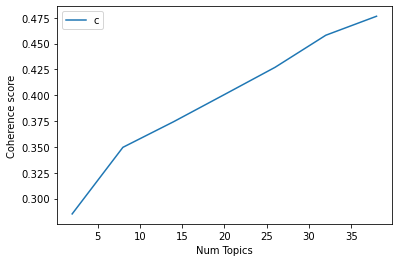

In [12]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.2851
Num Topics = 8  has Coherence Value of 0.3495
Num Topics = 14  has Coherence Value of 0.3743
Num Topics = 20  has Coherence Value of 0.4006
Num Topics = 26  has Coherence Value of 0.427
Num Topics = 32  has Coherence Value of 0.458
Num Topics = 38  has Coherence Value of 0.4764


In [14]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


[(0,
  '0.321*"app" + 0.114*"request" + 0.090*"option" + 0.039*"user" + '
  '0.030*"transport" + 0.028*"rating" + 0.022*"feature" + 0.020*"review" + '
  '0.017*"improvement" + 0.011*"profile"'),
 (1,
  '0.398*"driver" + 0.049*"traffic" + 0.046*"lot" + 0.038*"road" + '
  '0.038*"area" + 0.037*"vehicle" + 0.022*"bit" + 0.017*"side" + '
  '0.015*"quality" + 0.015*"rude"'),
 (2,
  '0.327*"time" + 0.134*"minute" + 0.126*"guy" + 0.042*"estimate" + '
  '0.028*"job" + 0.025*"notification" + 0.014*"estimation" + 0.013*"shame" + '
  '0.009*"driver_arrive" + 0.008*"walk"'),
 (3,
  '0.350*"service" + 0.309*"love" + 0.080*"rate" + 0.025*"easy_use" + '
  '0.018*"good" + 0.007*"excellent" + 0.006*"affordable_ride" + '
  '0.006*"please_make" + 0.005*"polite_driver" + 0.005*"fast_efficient"'),
 (4,
  '0.485*"driver" + 0.063*"fare" + 0.060*"passenger" + 0.054*"change" + '
  '0.024*"pricing" + 0.019*"cancellation" + 0.012*"stop" + 0.009*"fuel" + '
  '0.008*"thumb" + 0.008*"term"'),
 (5,
  '0.338*"ride" +